# Proyek Klasifikasi Gambar: Fruit 360 (100 x 100)
- **Nama:** Atifa Fiorenza
- **Email:** atifafiorenza24@gmail.com
- **ID Dicoding:** [Input Username]

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install tensorflow

In [129]:
!pip install tensorflowjs

In [130]:
# Manajemen File dan Folder
import os
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
import joblib

# Visualisasi
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Pembuatan dan Evaluasi Model
import keras
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import tensorflowjs as tfjs

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Mengatur Peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Preparation

In [ ]:
from google.colab import files
files.upload()  # Upload file kaggle.json dari lokal

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"atifa1110","key":"2972f282815cfd20a65bc10625d79e46"}'}

In [ ]:
# Membuat folder .kaggle untuk credentials
!mkdir -p ~/.kaggle

# Menyalin file kaggle.json ke folder .kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

# Memberikan permission agar kaggle.json dapat digunakan
!chmod 600 ~/.kaggle/kaggle.json

# Mendownload dataset Rice Leaf Diseases dari Kaggle
!kaggle datasets download -d moltean/fruits

Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
100% 3.49G/3.49G [00:37<00:00, 257MB/s]
100% 3.49G/3.49G [00:37<00:00, 98.6MB/s]


In [ ]:
# Mengekstrak file dataset
!unzip fruits.zip -d fruit60

Streaming output truncated to the last 5000 lines.
  inflating: fruit60/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_277.jpg  
  inflating: fruit60/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_281.jpg  
  inflating: fruit60/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_285.jpg  
  inflating: fruit60/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_289.jpg  
  inflating: fruit60/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_29.jpg  
  inflating: fruit60/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_33.jpg  
  inflating: fruit60/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_37.jpg  
  inflating: fruit60/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_41.jpg  
  inflating: fruit60/fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_45.jpg  
  inflating: fruit

### Data Loading

In [132]:
# Menampilkan struktur direktori setelah ekstraksi
train_dir = 'fruit60/fruits-360_100x100/fruits-360/Training'
test_dir = 'fruit60/fruits-360_100x100/fruits-360/Test'
# Melihat daftar folder di dalam base_dir
os.listdir(train_dir)

['Grape White 2',
 'Beetroot 1',
 'Apple Red Yellow 2',
 'Cherry 3',
 'Eggplant long 1',
 'Pear Abate 1',
 'Corn 1',
 'Nectarine Flat 1',
 'Lemon 1',
 'Grape White 4',
 'Cherry 5',
 'Cabbage white 1',
 'Orange 1',
 'Banana Lady Finger 1',
 'Cabbage red 1',
 'Tomato 7',
 'Pear Forelle 1',
 'Cherry 2',
 'Apple 9',
 'Limes 1',
 'Blackberrie not rippen 1',
 'Apple Golden 3',
 'Nut 1',
 'Potato Sweet 1',
 'Quince 2',
 'Blackberrie 1',
 'Grape Blue 1',
 'Grape White 1',
 'Lemon Meyer 1',
 'Quince 3',
 'Apple 10',
 'Cucumber 9',
 'Peach 1',
 'Pepper Red 1',
 'Cocos 1',
 'Walnut 1',
 'Zucchini 1',
 'Avocado Black 1',
 'Nectarine 1',
 'Pear Williams 1',
 'Apple 11',
 'Pitahaya Red 1',
 'Grape Pink 1',
 'Eggplant 1',
 'Cherry 4',
 'Peach Flat 1',
 'Cucumber Ripe 2',
 'Apple Golden 1',
 'Grapefruit White 1',
 'Cucumber 10',
 'Tomato Heart 1',
 'Pear Stone 1',
 'Quince 4',
 'Blueberry 1',
 'Huckleberry 1',
 'Pineapple Mini 1',
 'Nut Forest 1',
 'Apple Core 1',
 'Apple Crimson Snow 1',
 'Cactus fru

In [122]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(train_dir):
    counting = len(os.listdir(os.path.join(train_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 104456


(100, 100)


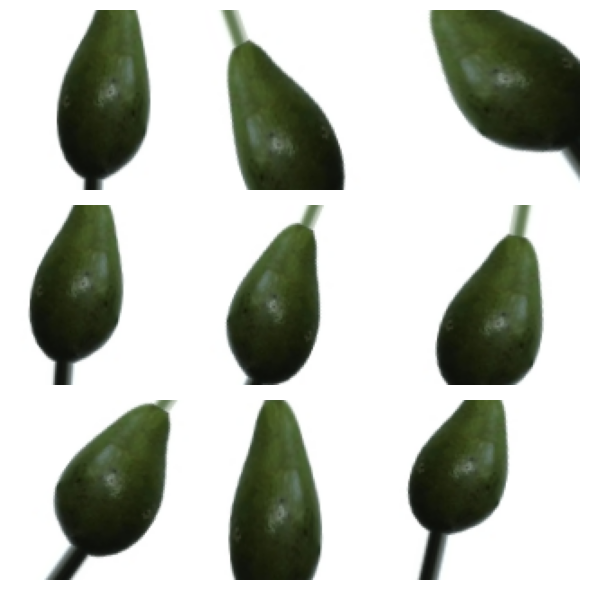

In [123]:
img_path = 'fruit60/fruits-360_100x100/fruits-360/Training/Avocado Green 1/r0_0_100.jpg'

img = load_img(img_path)
print(img.size)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Dengan rescale
preview_datagen = ImageDataGenerator(
    rescale=1./255,     # pixel jadi 0-1
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

aug_iter = preview_datagen.flow(x, batch_size=1)

fig, ax = plt.subplots(3, 3, figsize=(6,6))

for i in range(9):
    aug_img = next(aug_iter)[0]  # shape (100,100,3), float32 [0..1]
    # Konversi ke uint8 agar plt.imshow bisa tampil normal
    aug_img_uint8 = (aug_img * 255).astype(np.uint8)
    ax[i//3, i%3].imshow(aug_img_uint8)
    ax[i//3, i%3].axis('off')

plt.tight_layout()
plt.show()

In [91]:
# Simpan ukuran gambar unik yang ditemukan
sizes = set()

for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(root, file)
            img = load_img(img_path)
            sizes.add(img.size)  # (width, height)

print("Ukuran gambar unik di training data:", sizes)

Ukuran gambar unik di training data: {(100, 100)}


### Data Preprocessing

In [68]:
IMAGE_SIZE = (100,100)
BATCH_SIZE = 32

In [70]:
# Training -> augmentasi + normalisasi
train_datagen = ImageDataGenerator(
    rescale=1./255,          # normalisasi pixel ke 0-1
    rotation_range=40,       # rotasi acak max ±40°
    width_shift_range=0.2,   # geser horizontal max 20%
    height_shift_range=0.2,  # geser vertikal max 20%
    shear_range=0.2,         # shear transform
    zoom_range=0.2,          # zoom in/out
    horizontal_flip=True,    # flip horizontal
    fill_mode='nearest',     # isi piksel kosong,
    validation_split=0.2
)

# Testing -> hanya normalisasi
val_datagen = ImageDataGenerator(
    rescale= 1./255,
    validation_split=0.2,
)

test_datagen = ImageDataGenerator(
    rescale= 1./255,
)

In [72]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 83631 images belonging to 207 classes.
Found 20825 images belonging to 207 classes.
Found 34864 images belonging to 207 classes.


## Modelling

In [73]:
# Bangun model CNN sederhana
model = Sequential([
    Input(shape=(100, 100, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 264s 100ms/step - accuracy: 0.4169 - loss: 2.3833 - val_accuracy: 0.8170 - val_loss: 0.5985
Epoch 2/10
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 260s 100ms/step - accuracy: 0.8622 - loss: 0.4055 - val_accuracy: 0.8981 - val_loss: 0.2830
Epoch 3/10
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 264s 101ms/step - accuracy: 0.9086 - loss: 0.2698 - val_accuracy: 0.9050 - val_loss: 0.3378
Epoch 4/10
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 264s 101ms/step - accuracy: 0.9247 - loss: 0.2208 - val_accuracy: 0.9187 - val_loss: 0.2574
Epoch 5/10
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 262s 100ms/step - accuracy: 0.9367 - loss: 0.1814 - val_accuracy: 0.9193 - val_loss: 0.2606
Epoch 6/10
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 260s 99ms/step - accuracy: 0.9477 - loss: 0.1501 - val_accuracy: 0.9237 - val_loss: 0.2702
Epoch 7/10
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 259s 99ms/step - accuracy: 0.9522 - loss: 0.1420 - val_accuracy: 0.9346 - val_loss: 0.2034
Epoch 8/10
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 266s 102ms/step - accu

In [125]:
# Simpan model
model.save('model_cnn.h5')

## Evaluasi dan Visualisasi

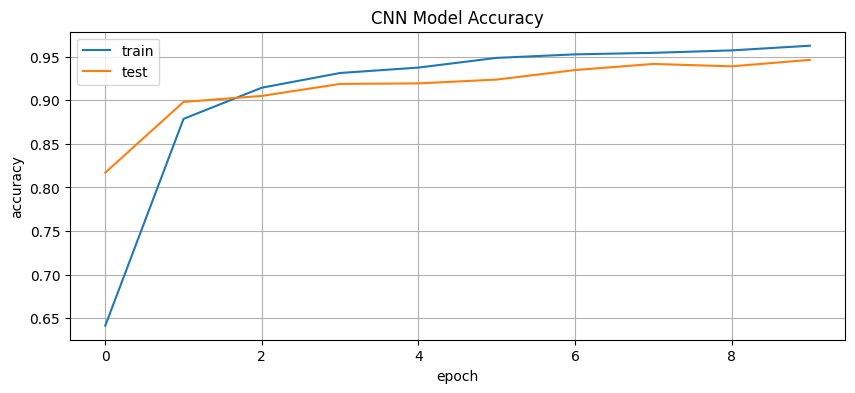

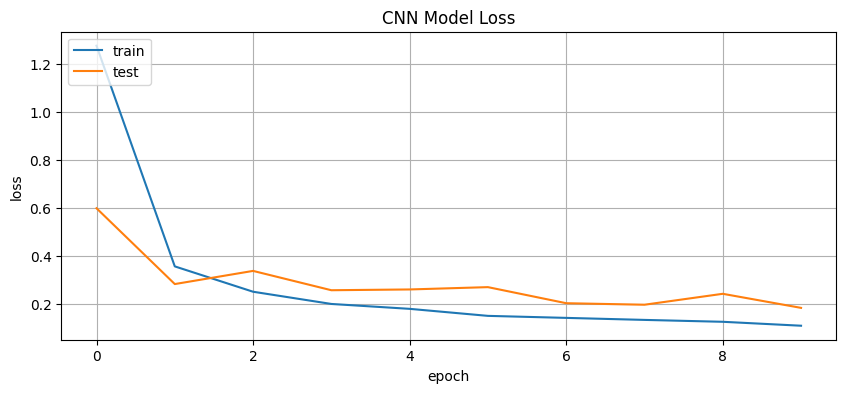

In [74]:
# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [124]:
loss, accuracy = model.evaluate(test_generator)
print("Test Loss: {:.5f}".format(loss))
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

1090/1090 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9478 - loss: 0.2341
Test Loss: 0.22385
Test Accuracy: 94.51%


In [86]:
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=class_labels))

1090/1090 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step
                           precision    recall  f1-score   support

                 Apple 10       1.00      0.89      0.94       231
                 Apple 11       1.00      1.00      1.00       142
                 Apple 12       0.99      1.00      0.99       154
                 Apple 13       1.00      1.00      1.00       235
                 Apple 14       0.99      1.00      1.00       154
                 Apple 17       0.70      1.00      0.83       201
                 Apple 18       1.00      0.64      0.78       160
                 Apple 19       0.97      1.00      0.99       241
                  Apple 5       1.00      1.00      1.00       146
                  Apple 6       1.00      0.98      0.99       157
                  Apple 7       1.00      1.00      1.00       229
                  Apple 8       0.88      0.84      0.86       228
                  Apple 9       0.92      0.99      0.95       231
         Apple B

## Konversi Model

In [127]:
# Convert model Keras ke TF-Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan file TF-Lite
with open('model_cnn.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpa4jyaw1k'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='keras_tensor_24')
Output Type:
  TensorSpec(shape=(None, 207), dtype=tf.float32, name=None)
Captures:
  137767321974160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137767321972432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137767321974736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137767321975312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137767321972816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137767321972240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137767321973200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137767321973008: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [131]:
# Simpan model Keras ke TFJS format di folder 'tfjs_model_dir'
tfjs.converters.save_keras_model(model, 'tfjs_model_cnn.bin')

failed to lookup keras version from the file,
    this is likely a weight only file


## Inference (Optional)

In [85]:
# 1. Load gambar (misal pakai Keras utils)
img_path = 'fruit60/fruits-360_100x100/fruits-360/Test/Strawberry 1/321_100.jpg'
img = load_img(img_path, target_size=IMAGE_SIZE)  # ukuran sesuai model

# 2. Ubah ke array
img_array = img_to_array(img)

# 3. Normalisasi (sesuaikan dengan preprocessing model)
img_array = img_array / 255.0

# 4. Tambah dimensi batch (karena model butuh batch)
img_array = np.expand_dims(img_array, axis=0)  # shape jadi (1, height, width, channels)

# 5. Predict dengan model
pred = model.predict(img_array)

# 6. Ambil indeks kelas dengan probabilitas tertinggi
pred_class_idx = np.argmax(pred, axis=1)[0]

# 7. Ambil label nama kelas
class_labels = list(train_generator.class_indices.keys())  # atau dari test_generator.class_indices.keys()
pred_class_label = class_labels[pred_class_idx]

print(f'Prediksi kelas: {pred_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
Prediksi kelas: Strawberry 1
